In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("zomato.csv",encoding='latin-1')

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
df.drop(columns=['Cuisines'],inplace=True)

In [7]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
df1 = pd.DataFrame()
df1['rating'] = df['Aggregate rating']
df1['votes'] = df['Votes']

In [9]:
df1.head()

,rating,votes
0,4.8,314
1,4.5,591
2,4.4,270
3,4.9,365
4,4.8,229


In [10]:
x = df1.iloc[:,0:1]
y = df1.iloc[:,-1]

In [11]:
x.shape,y.shape

((9551, 1), (9551,))

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [13]:
x_train.shape,x_test.shape

((7640, 1), (1911, 1))

In [14]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [15]:
linear.fit(x_train,y_train)

LinearRegression()

In [16]:
y_pred = linear.predict(x_test)

In [34]:
y_pred

array([191.41974133, 347.00340204, 225.99388816, ..., 191.41974133,
       260.56803498, 286.4986451 ])

In [36]:
y_test

8288      30
3601    1934
5887      82
3305     427
218      122
        ... 
8764      19
6181      50
1362      33
503      373
4318     361
Name: votes, Length: 1911, dtype: int64

In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
print(mean_absolute_error(y_pred,y_test))
print(mean_squared_error(y_pred,y_test))
print(np.sqrt(mean_squared_error(y_pred,y_test)))

198.0393774248477
220766.70736856718
469.8581779309233


In [20]:
df2 = pd.DataFrame()
df2['y_test'] = y_test
df2['y_pred'] = y_pred

In [21]:
df2.head()

,y_test,y_pred
8288,30,191.419741
3601,1934,347.003402
5887,82,225.993888
3305,427,217.350351
218,122,277.855108


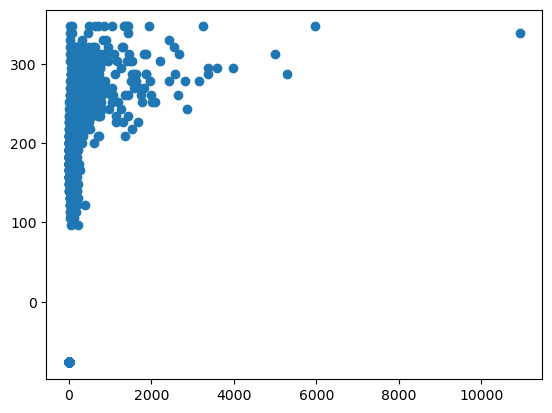

In [22]:
plt.scatter(x='y_test',y='y_pred',data=df2)

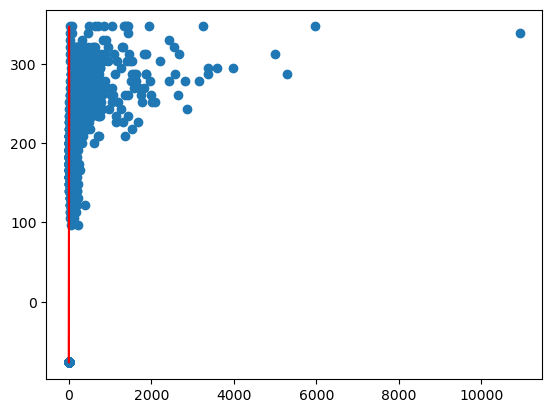

In [23]:
plt.plot(x_test,linear.predict(x_test),color='r')
plt.scatter(x='y_test',y='y_pred',data=df2)

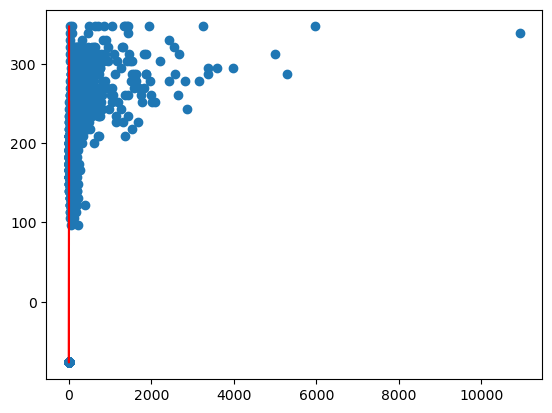

In [24]:
plt.plot(x_train,linear.predict(x_train),color='r')
plt.scatter(x='y_test',y='y_pred',data=df2)

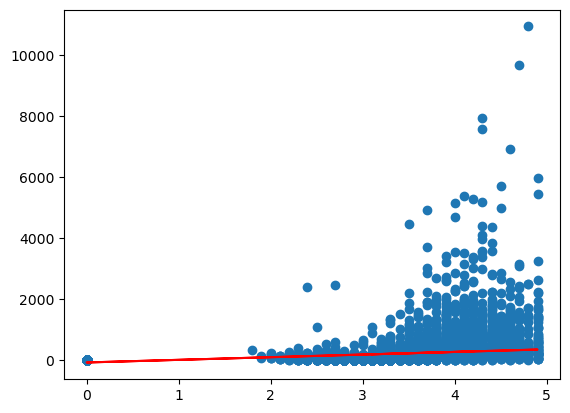

In [25]:
plt.plot(x_test,y_pred,color='r')
plt.scatter(df['Aggregate rating'],df['Votes'])

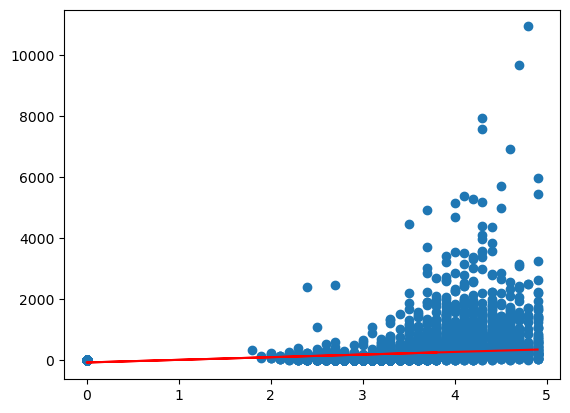

In [26]:
plt.plot(x_train,linear.predict(x_train),color='r')
plt.scatter(df['Aggregate rating'],df['Votes'])

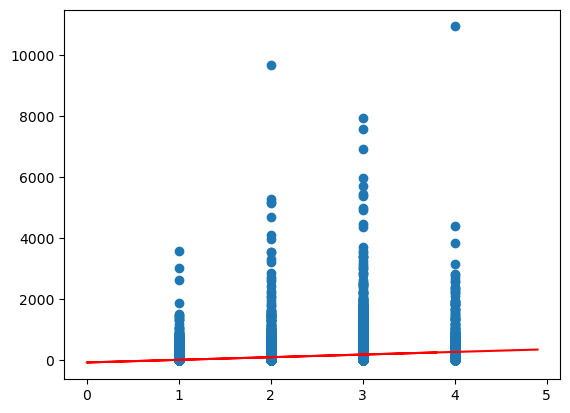

In [27]:
plt.plot(x_train,linear.predict(x_train),color='r')
plt.scatter(df['Price range'],df['Votes'])